In [2]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [6]:
# print("Current working directory:", os.getcwd())

In [8]:
goldenRatio = (5**.5 - 1) / 2.

In [30]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):     
    tmp_file = h5py.File(file_name, "r")
    if label in tmp_file.keys():
        tmp_Sz = np.array(tmp_file[label]).transpose()
    else:
        error("Error: key doesn't exist!")
    return tmp_Sz

In [32]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [166]:
Nsites = 200   # Number of physical sites in the 1D chain.
Nsamples = 50  # Number of samples.

In [168]:
SvN = np.zeros([Nsamples, Nsites - 1])
# colors = obtain_colors(Nsamples + 5, cm.gist_heat_r)

In [170]:
for index in range(1, Nsamples + 1):
    tmp_file = "data/heisenberg_uniform_disorder_v" + str(index) + ".h5"
    SvN[index - 1, :] = data_extrapolation(tmp_file, "SvN")
SvN

array([[0.57921658, 0.36771148, 0.44841995, ..., 0.707318  , 0.28194394,
        0.69314718],
       [0.66454418, 0.2526534 , 0.59285395, ..., 0.70676651, 0.14052455,
        0.69314718],
       [0.6929156 , 0.31219032, 0.75661218, ..., 0.69669998, 0.76226144,
        0.69314718],
       ...,
       [0.69314718, 0.16839445, 0.70971932, ..., 0.70833223, 1.06312461,
        0.69088351],
       [0.69314718, 0.16972626, 0.71734276, ..., 0.69667819, 0.20528242,
        0.69314716],
       [0.69314348, 0.62509122, 0.72155268, ..., 0.69888785, 0.22392401,
        0.69314718]])

In [172]:
SvN_mean = np.mean(SvN, axis = 0)
SvN_mean.shape

(199,)

In [174]:
SvN_std = np.std(SvN, axis = 0)
SvN_std = np.sqrt(SvN_std) / np.sqrt(Nsamples)
SvN_std.shape

(199,)

In [176]:
SvN0 = data_extrapolation("data/heisenberg_uniform_disorder_v0.h5", "SvN")

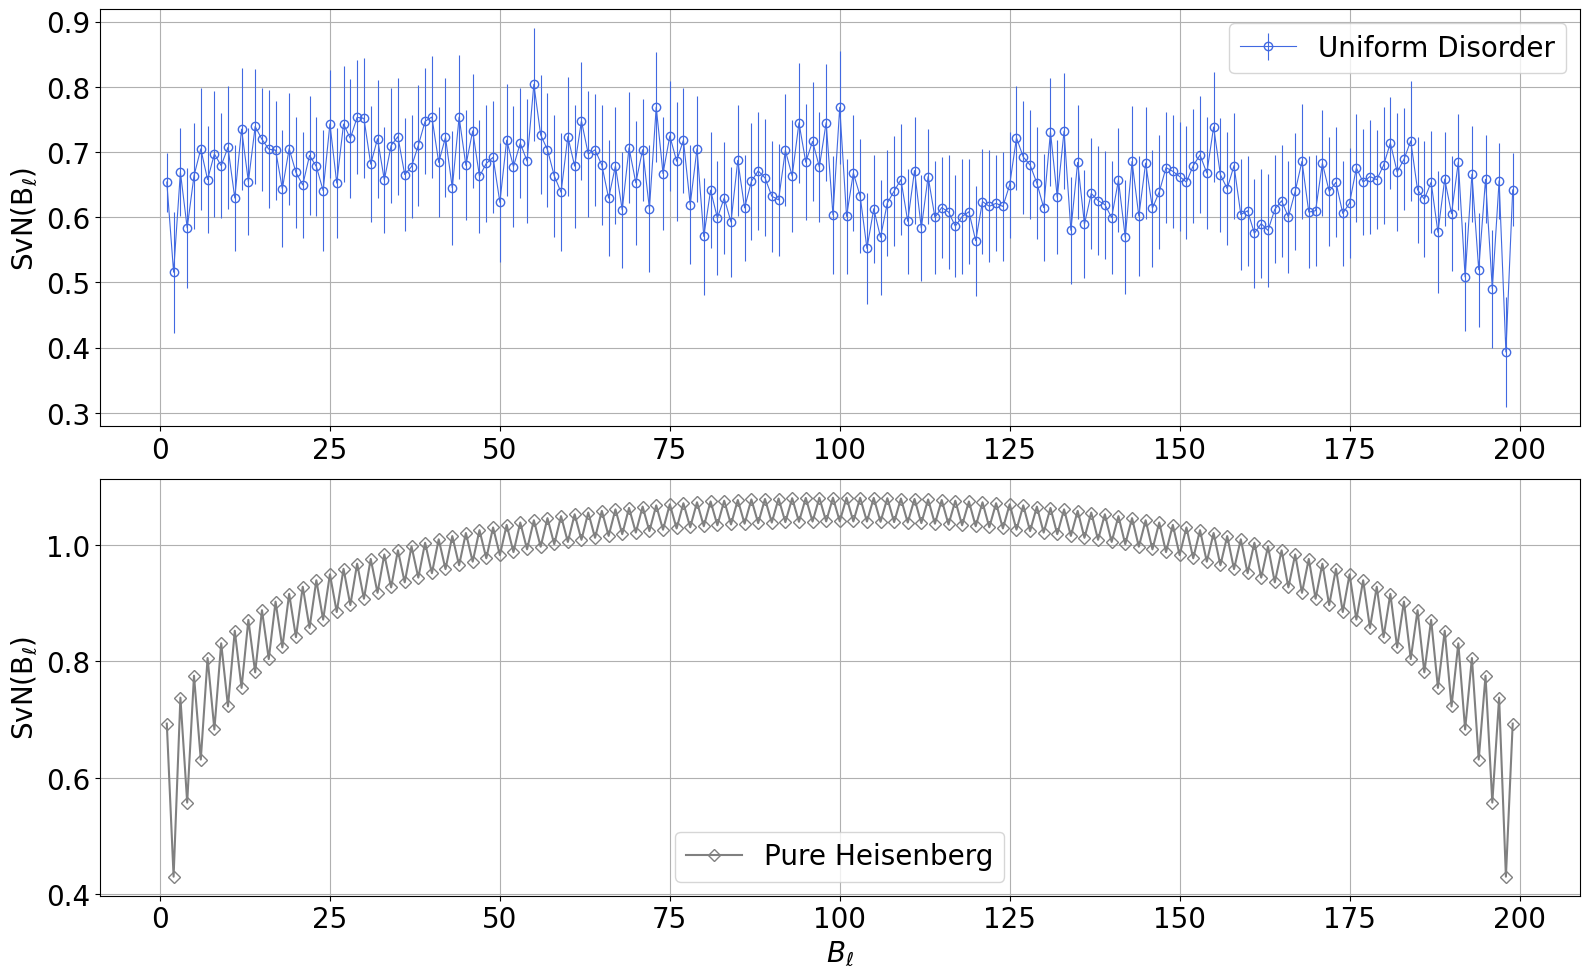

In [180]:
'''
    Analyze the sample average and standard error of disorder realization
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
# for index in range(Nsamples):
#     ax.plot(np.arange(1, Nsites), SvN[index, :], color = colors[index + 5], linewidth = 0.8, \
#                 marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none")
# ax.plot(np.arange(1, Nsites), SvN[0, :], color = "royalblue", linewidth = 0.8, \
#         marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Random $\#1$")
# ax.plot(np.arange(1, Nsites), SvN[1, :], color = "firebrick", linewidth = 0.8, \
#         marker = "s", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Random $\#2$")
ax.errorbar(np.arange(1, Nsites), SvN_mean, yerr = SvN_std, color = "royalblue", linewidth = 0.8, \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Uniform Disorder")
ax.set_ylabel(r"$\rm SvN(B_{\ell})$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, Nsites), SvN0, color = "gray", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Pure Heisenberg")

ax.set_xlabel(r"$B_{\ell}$", fontsize = 20)
ax.set_ylabel(r"$\rm SvN(B_{\ell})$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("figures/Uniform_disorder_N200_SvN.pdf")

In [182]:
Sz0 = data_extrapolation("data/heisenberg_uniform_disorder_v0.h5", "Sz T=0")

In [184]:
Sz = np.zeros([Nsamples, Nsites])
for index in range(1, Nsamples + 1):
    tmp_file = "data/heisenberg_uniform_disorder_v" + str(index) + ".h5"
    Sz[index - 1, :] = data_extrapolation(tmp_file, "Sz T=0")
SvN

array([[0.57921658, 0.36771148, 0.44841995, ..., 0.707318  , 0.28194394,
        0.69314718],
       [0.66454418, 0.2526534 , 0.59285395, ..., 0.70676651, 0.14052455,
        0.69314718],
       [0.6929156 , 0.31219032, 0.75661218, ..., 0.69669998, 0.76226144,
        0.69314718],
       ...,
       [0.69314718, 0.16839445, 0.70971932, ..., 0.70833223, 1.06312461,
        0.69088351],
       [0.69314718, 0.16972626, 0.71734276, ..., 0.69667819, 0.20528242,
        0.69314716],
       [0.69314348, 0.62509122, 0.72155268, ..., 0.69888785, 0.22392401,
        0.69314718]])

In [186]:
Sz_mean = np.mean(Sz, axis = 0)
Sz_mean.shape

(200,)

In [188]:
Sz_std = np.sqrt(np.std(Sz, axis = 0)) / np.sqrt(Nsamples)
Sz_std.shape

(200,)

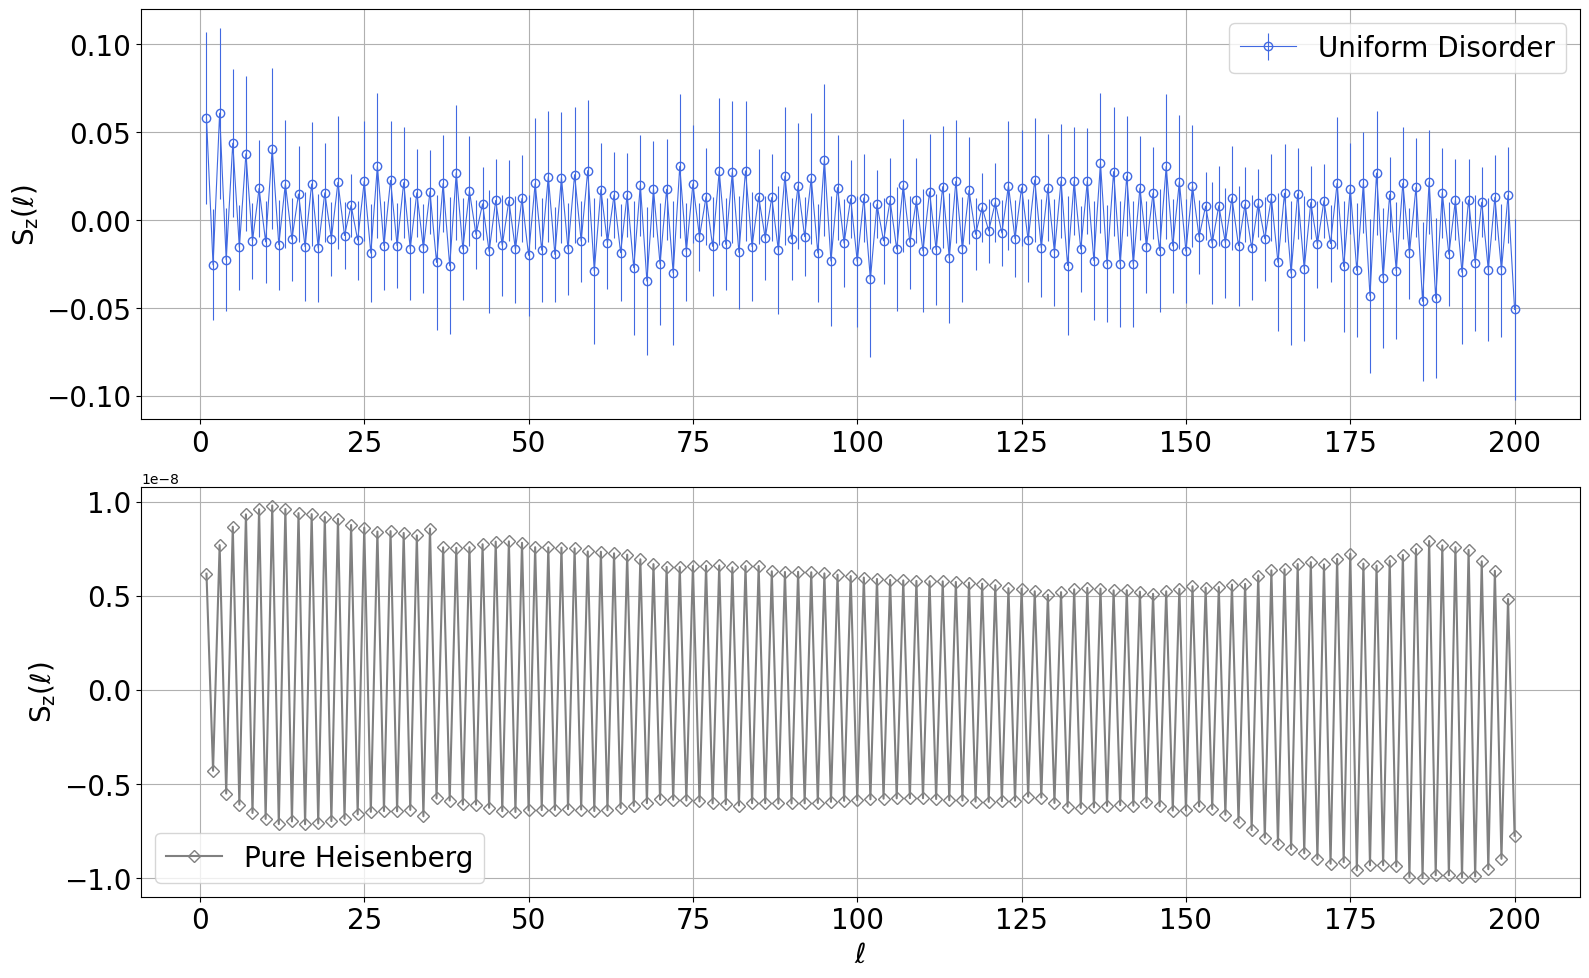

In [192]:
'''
    Analyze the sample average and standard error of disorder realization
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
ax.errorbar(np.arange(1, Nsites + 1), Sz_mean, yerr = Sz_std, color = "royalblue", linewidth = 0.8, \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Uniform Disorder")
ax.set_ylabel(r"$\rm S_{z}(\ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, Nsites + 1), Sz0, color = "gray", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Pure Heisenberg")

ax.set_xlabel(r"$\ell$", fontsize = 20)
ax.set_ylabel(r"$\rm S_{z}(\ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("figures/Uniform_disorder_N200_SvN.pdf")

In [1056]:
# Czz_tau002 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.02_epsilon1E-8.h5", "Czz_unequaltime")

In [1058]:
# Czz_TD_tau002 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.02.h5", "Czz_unequaltime")

In [1060]:
# label = [r"$t=10, \Delta\tau=0.1$", r"$t=20$", r"$t=30$", r"$t=40$", r"$t=50$", r"$t=60$", r"$t=70$", r"$t=80$", r"$t=90$", r"$t=100$"]
# label_tau002 = [r"$t=10, \Delta\tau=0.02$", r"$t=20$", r"$t=30$", r"$t=40$", r"$t=50$", r"$t=60$", r"$t=70$", r"$t=80$", r"$t=90$", r"$t=100$"]

In [1062]:
# '''
#     Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
# '''

# fig = plt.figure(figsize = (16, 32 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)

# for index in range(10):
#     ax = fig.add_subplot(spec[index, 0])
#     ax.plot(np.arange(1, 201), Czz_TD[(index + 1) * 100 - 1, :].real, color = color[index + 2], \
#             marker = "s", markersize = 8, markeredgewidth = 2, markerfacecolor = "none", label = label[index])
    
#     if index != 9:
#         ax.set_xticklabels([])
#     else:
#         ax.set_xlabel("$\ell$", fontsize = 16)

#     ax.legend(frameon = True, fontsize = 16, bbox_to_anchor = [0.2, 0.5], bbox_transform = ax.transAxes)
#     ax.set_ylabel(r'$\langle S_{z}^{t}(\ell)S_{z}^{0}(100) \rangle$', fontsize = 16)    
#     ax.tick_params(axis = "both", which = "major", labelsize = 16)
#     ax.grid()  

# # plt.savefig('Figures/XX_TEBD_N200_T100_Time_Dependent_Czz.pdf')

In [283]:
# Czz_tau005[-6 : -1, 99]

In [31]:
# Czz_tau005[-6 : -1, 125]

In [33]:
# Czz_tau005[-6 : -1, 175]

In [35]:
# \Delta\tau = 0.1, \epsilon = 10^{-8}
Czz1[-6 : , 99]

array([-0.00226917-0.00153291j, -0.00252885-0.0010123j ,
       -0.0026741 -0.00045082j, -0.00269923+0.00012738j,
       -0.00260348+0.00069755j, -0.00239111+0.0012353j ])

In [37]:
# \Delta\tau = 0.1, \epsilon = 10^{-10}
Czz2[-6 : , 99]

array([-0.00219609-0.00152849j, -0.00246228-0.00100865j,
       -0.00261408-0.00044643j, -0.00264546+0.000134j  ,
       -0.00255538+0.00070781j, -0.0023478 +0.00125049j])

In [285]:
# \Delta\tau = 0.05, \epsilon = 10^{-10}
Czz_tau005[-6 : , 99]

array([-0.00476293-0.00236064j, -0.00496203-0.00203733j,
       -0.00513934-0.00169767j, -0.00529356-0.00134315j,
       -0.00542347-0.00097531j, -0.00552797-0.0005958j ])

In [157]:
Czz_tau005.shape

(2000, 200)

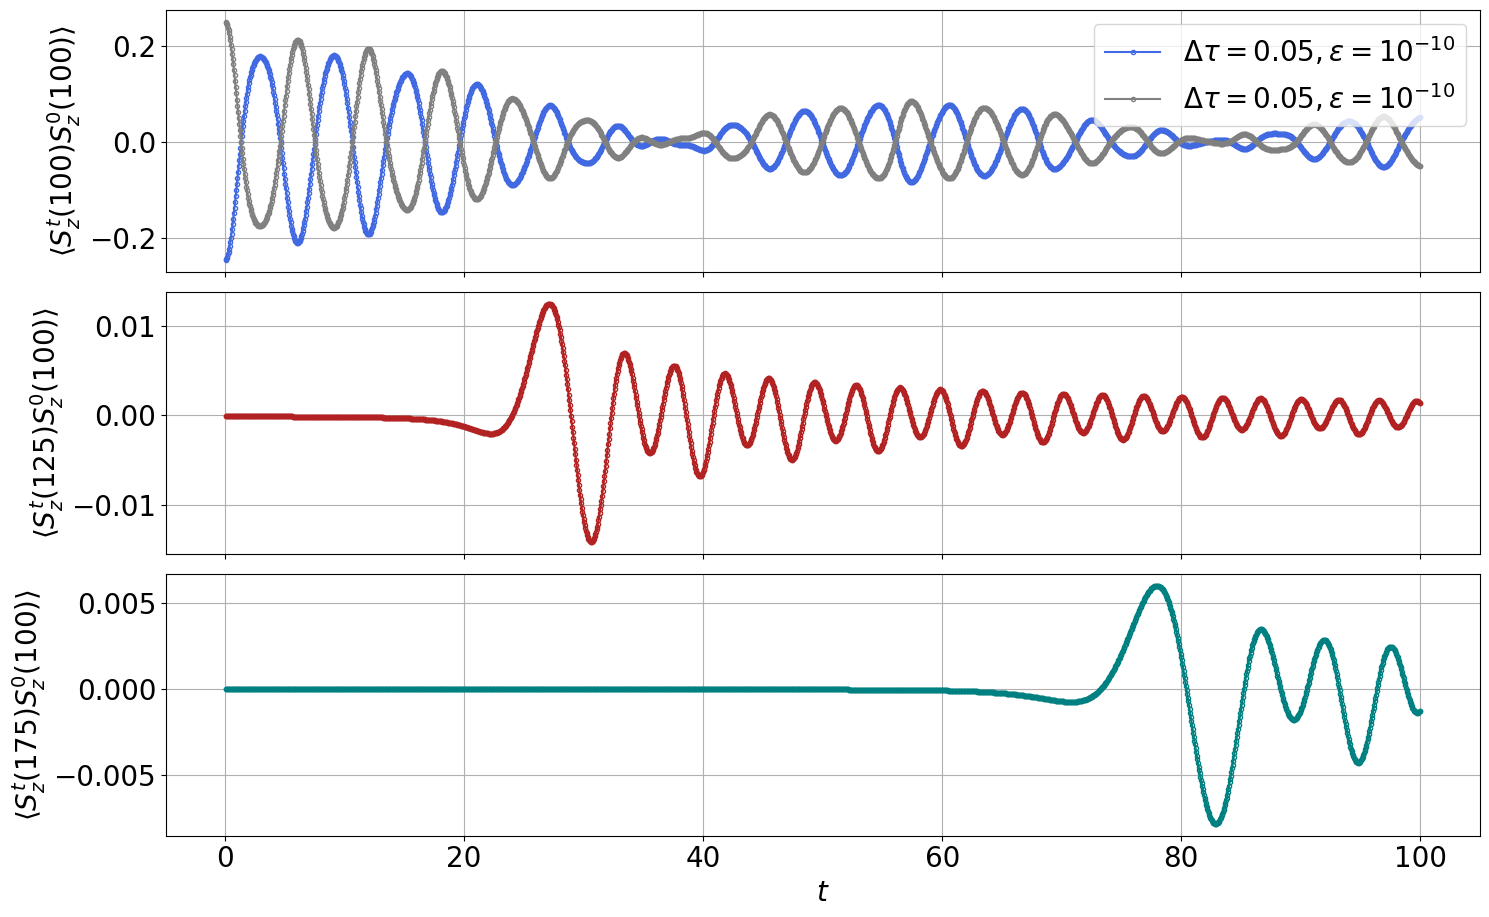

In [1052]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the XX model
'''

fig = plt.figure(figsize = (15, 15 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)


ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005_odd[:, 99].real / 2, color = "royalblue", \
        marker = "o", markersize = 3, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.05, \epsilon=10^{-10}$")
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005_odd[:, 98].real / 2, color = "gray", \
        marker = "o", markersize = 3, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.05, \epsilon=10^{-10}$")
# ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 99].real / 2, color = "gray", \
#         marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.1, \epsilon=10^{-10}$")

# ax.set_xlim(75, 100)
# ax.set_ylim(-0.005, 0.005)
ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(100)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005[:, 124].real / 2, color = "firebrick", \
        marker = "o", markersize = 3, markeredgewidth = 1, markerfacecolor = "none")
# ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 125].real / 2, color = "gray", \
#         marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none")

# ax.set_xlim(75, 100)
ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(125)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  


ax = fig.add_subplot(spec[2, 0])
ax.plot(np.arange(1, 2001) * 0.05, Czz_tau005[:, 174].real / 2, color = "teal", \
        marker = "o", markersize = 3, markeredgewidth = 1, markerfacecolor = "none",)
# ax.plot(np.arange(1, 1001) * 0.1, Czz2[:, 175].real / 2, color = "gray", \
#         marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none")

# ax.set_xlim(75, 100)
ax.set_xlabel(r'$t$', fontsize = 20)
ax.set_ylabel(r'$\langle S_{z}^{t}(175)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  

# plt.savefig('Figures/Heisenberg_TEBD_J1_1.0_J2_0_delta1.0_N100_T100_Czz_tau005.pdf')

In [1064]:
Czz = Czz_tau005_odd[19 : : 20, :].real
Czz.shape

(100, 200)

In [1066]:
tickFontSize = 20

In [1068]:
Czz[0, 98 : 100]

array([ 0.03607256, -0.03968995])

In [990]:
# # Plot the time-dependent spin correlation function and visualize the light-cone structure
# # import seaborn as sns
# # sns.set(font_scale = 1.5)

# fig = plt.figure(figsize = (15, 20 * goldenRatio), tight_layout = True)
# ax = fig.add_subplot(spec[0, 0])

# im1 = ax.imshow(Czz, cmap = "viridis", aspect = "auto", origin = "lower")
#                 # extent=[  0, Nq,   wList[0], wList[-1] ],  
#                 # cmap=my_cm)
# cbar=fig.colorbar(im1, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=tickFontSize)

# # ax = sns.heatmap(Czz, cmap = "flare", cbar = True, annot = False, robust = True)
# ax.set_xticks(np.arange(0, 201, 50))
# ax.set_xticklabels([r"$0$", r"$50$", r"$100$", r"$150$", r"$200$"], fontsize = 20)
# ax.set_yticks(np.arange(0, 101, 10))
# ax.set_yticklabels([r"$0$", r"$10$", r"$20$", r"$30$", r"$40$", r"$50$", r"$60$", r"$70$", r"$80$", r"$90$", r"$100$"], fontsize = 20)
# ax.set_xlabel(r"$\ell$", fontsize = 20)
# ax.set_ylabel(r"$t$", fontsize  = 20)
# plt.title(r"$Re \langle S_{t}^{z}(\ell)S_{0}^{z}(100) \rangle$", fontsize = 20)
# # ax.set(xlabel = r"$\ell$", ylabel = r"$t$", title = r"$\langle S^{z}_{t}(\ell) S^{z}_{0}(\ell^{\prime} = 100) \rangle$", labelsize = 20)
# # ax.invert_yaxis()

# # plt.savefig('Figures/XX_TEBD_N200_T100_Czz_tau005_Light_Cone.pdf')

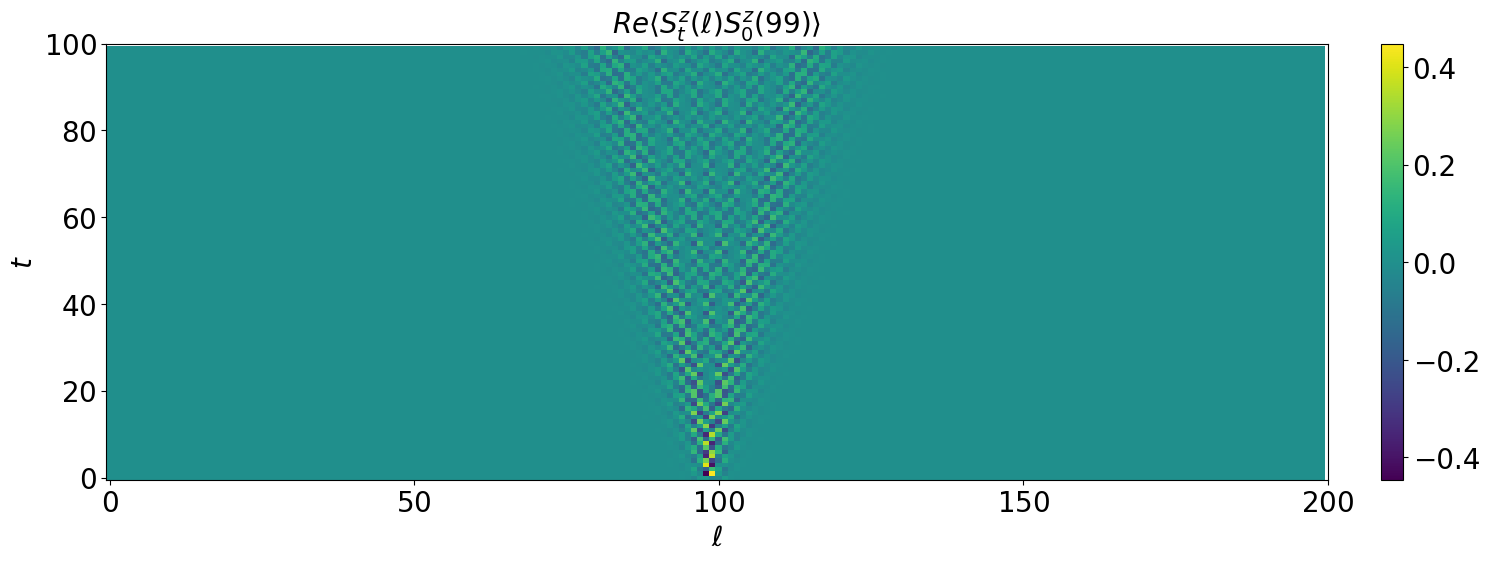

In [1110]:
# Plot the time-dependent spin correlation function and visualize the light-cone structure
# import seaborn as sns
# sns.set(font_scale = 1.5)

fig = plt.figure(figsize = (15, 25 * goldenRatio), tight_layout = True)
ax = fig.add_subplot(spec[0, 0])

im1 = ax.imshow(Czz, cmap = "viridis", aspect = "auto", origin = "lower")
cbar=fig.colorbar(im1, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=tickFontSize)


# ax = sns.heatmap(Czz, cmap = "flare", cbar = True, annot = False, robust = True)
ax.set_xticks(np.arange(0, 201, 50))
ax.set_xticklabels([r"$0$", r"$50$", r"$100$", r"$150$", r"$200$"], fontsize = 20)
ax.set_yticks(np.arange(0, 101, 20))
# ax.set_yticklabels([r"$0$", r"$10$", r"$20$", r"$30$", r"$40$", r"$50$", r"$60$", r"$70$", r"$80$", r"$90$", r"$100$"], fontsize = 20)
ax.set_yticklabels([r"$0$", r"$20$", r"$40$", r"$60$", r"$80$", r"$100$"], fontsize = 20)
ax.set_xlabel(r"$\ell$", fontsize = 20)
ax.set_ylabel(r"$t$", fontsize  = 20)
plt.title(r"$Re \langle S_{t}^{z}(\ell)S_{0}^{z}(99) \rangle$", fontsize = 20)

plt.savefig('Figures/Heisenberg_TEBD_J20p4_delta0p5_N200_t100_tau005_Light_Cone_Odd.pdf')

##### Compare the TEBD results with exact solutions

In [843]:
file = open("Data/Spin_correlations_100_100.dat", "r")
Czz_100 = []

for _ in file:
    tmp = _.split(" ")
    tmp_real = float(tmp[0])
    tmp_imag = float(tmp[1][:-4])
    Czz_100.append([tmp_real, tmp_imag])
    # print(tmp_real, tmp_imag)
# print(len(Czz_100), len(Czz_100[0]))

Czz_100 = 1.0 * np.array(Czz_100)
Czz_100.shape

(100, 2)

In [845]:
file = open("Data/Spin_correlations_100_126.dat", "r")
Czz_126 = []

for _ in file:
    tmp = _.split(" ")
    tmp_real = float(tmp[0])
    tmp_imag = float(tmp[1][:-3])
    Czz_126.append([tmp_real, tmp_imag])
    # print(tmp_real, tmp_imag)
# print(len(Czz_100), len(Czz_100[0]))

Czz_126 = np.array(Czz_126)
Czz_126.shape

(100, 2)

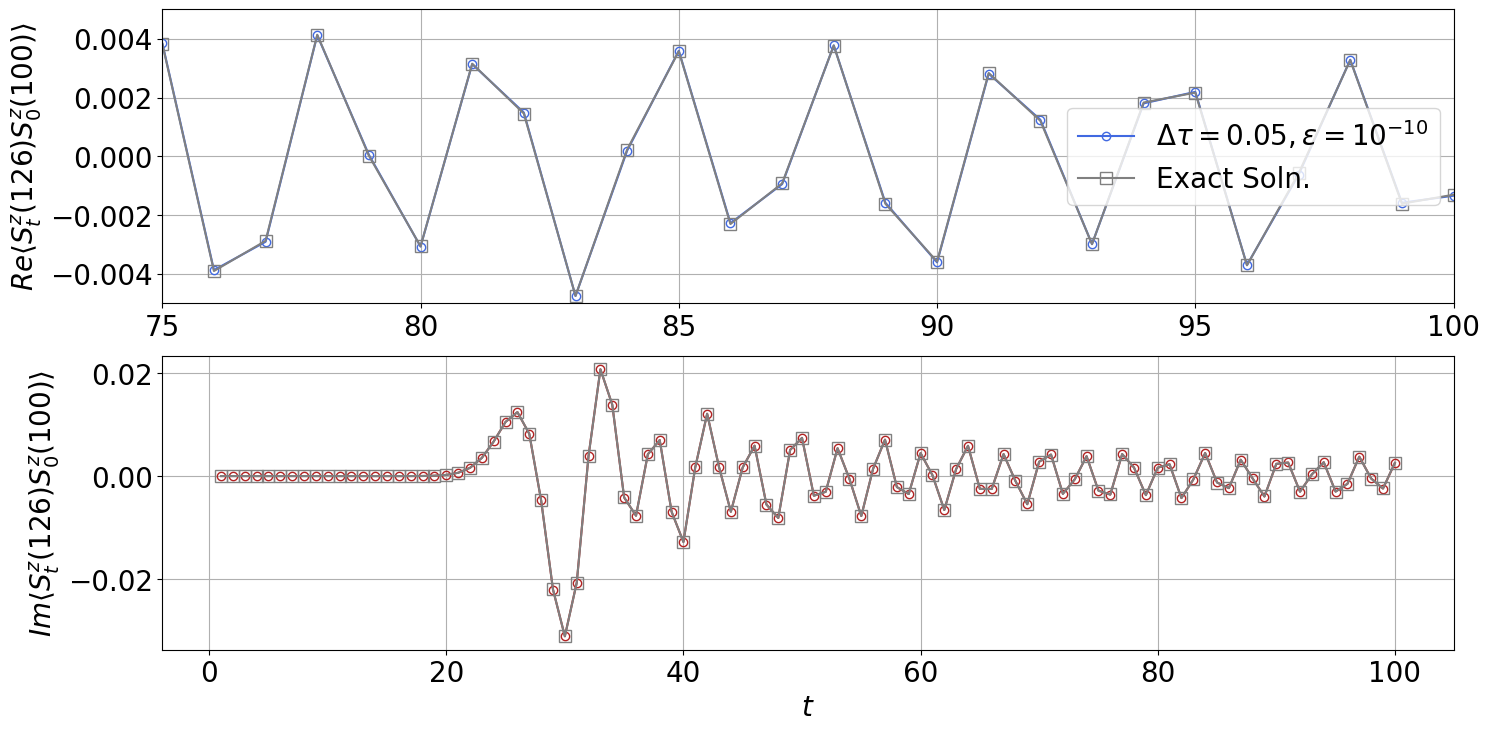

In [851]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the XX model
'''

fig = plt.figure(figsize = (15, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)


ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, 101), Czz_tau005[19 : : 20, 125].real, color = "royalblue", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.05, \epsilon=10^{-10}$")
ax.plot(np.arange(1, 101), Czz_126[:, 0], color = "gray", \
        marker = "s", markersize = 9, markeredgewidth = 1, markerfacecolor = "none", label = r"Exact Soln.")

ax.set_xlim(75, 100)
ax.set_ylim(-0.005, 0.005)
# ax.set_xticklabels([])
ax.set_ylabel(r"$Re \langle S_{t}^{z}(126) S_{0}^{z}(100) \rangle$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, 101), Czz_tau005[19 : : 20, 125].imag, color = "firebrick", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"$\Delta\tau=0.05, \epsilon=10^{-10}$")
ax.plot(np.arange(1, 101), Czz_126[:, 1], color = "gray", \
        marker = "s", markersize = 9, markeredgewidth = 1, markerfacecolor = "none", label = r"Exact Soln.")

# ax.set_xlim(85, 100)
# ax.set_xticklabels([])
ax.set_xlabel(r"$t$", fontsize = 20)
ax.set_ylabel(r'$Im \langle S_{t}^{z}(126) S_{0}^{z}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  

plt.savefig("Figures/XX_TEBD_N200_T100_Czz126_tau005_Exact_Solution_Benchmark.pdf")

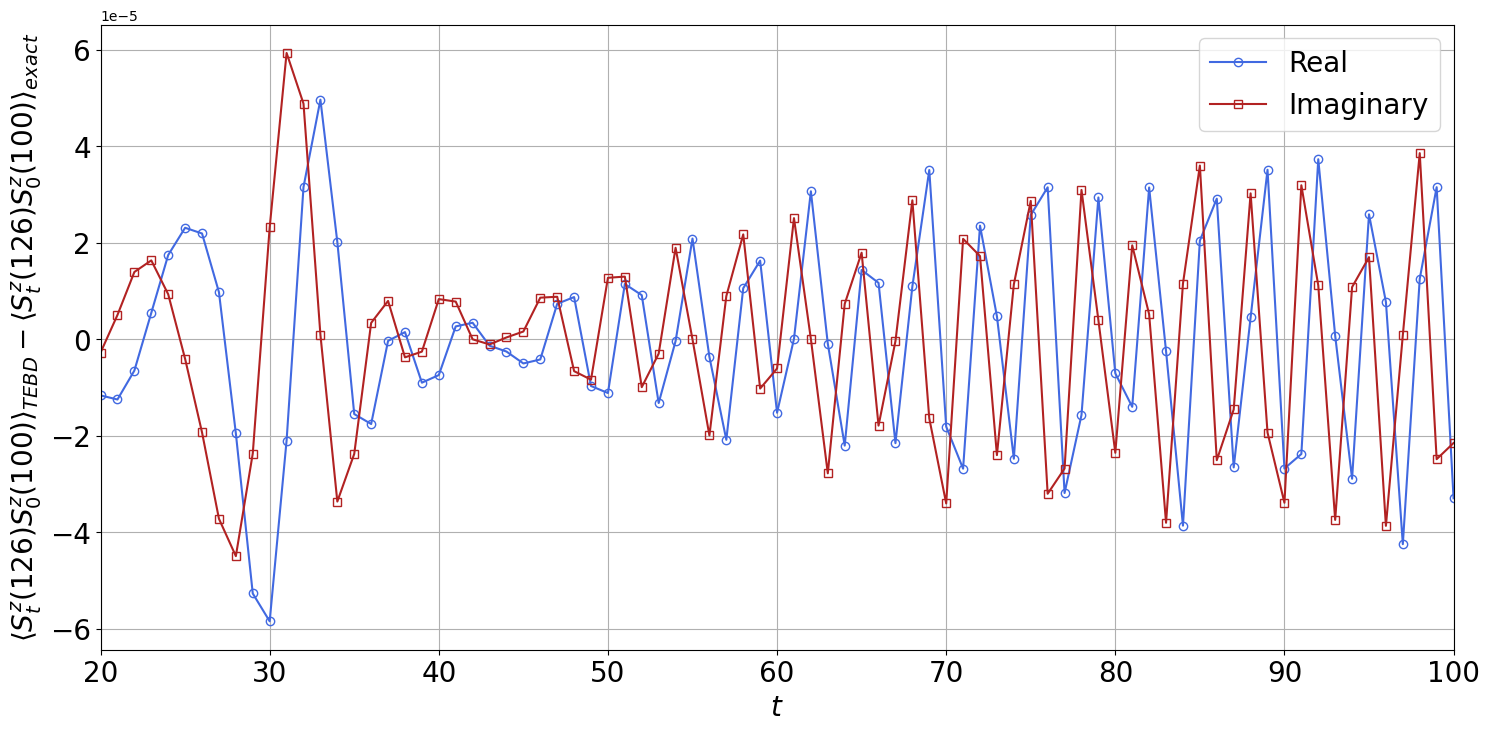

In [849]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the XX model
'''

fig = plt.figure(figsize = (15, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)


ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, 101), Czz_tau005[19 : : 20, 125].real - Czz_126[:, 0], color = "royalblue", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Real")
ax.plot(np.arange(1, 101), Czz_tau005[19 : : 20, 125].imag - Czz_126[:, 1], color = "firebrick", \
        marker = "s", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Imaginary")

ax.set_xlim(20, 100)
ax.set_xlabel(r"$t$", fontsize = 20)
ax.set_ylabel(r"$\langle S_{t}^{z}(126) S_{0}^{z}(100) \rangle_{TEBD} - \langle S_{t}^{z}(126)S_{0}^{z}(100) \rangle_{exact}$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


# plt.savefig("Figures/XX_TEBD_N200_T100_Czz126_tau005_Benchmark_Delta.pdf")

##### Compute the spectral function

In [1072]:
from scipy import integrate

In [1074]:
Czz_tau005_odd.shape

(2000, 200)

In [1076]:
Czz_tau005_even.shape

(2000, 200)

In [1078]:
# Czz_tau005_tmp = np.zeros([Czz_tau005.shape[0], Czz_tau005.shape[1]], dtype = "complex_")
# Czz_tau005_tmp.shape

In [1080]:
# for index in range(Czz_tau005.shape[0]):
#     Czz_tau005_tmp[index, :] = Czz_tau005[index, :] - Czz_tau005[0, :]

In [1082]:
# Define parameters used in the double Fourier transform
t = 100
tau = 0.05
N = t / tau
omega = np.arange(0, 2 * math.pi, 2 * math.pi / N)
omega.shape

(2000,)

In [1084]:
# Introduce the damping factor to prevent large spectral leakage due to the finite interval
eta = 0.2

In [1086]:
# Transform from the real space to the momentum space
sites = 200
reference = 100
k = 2 * math.pi / sites * np.arange(-sites//2 , sites//2, 1)
k.shape

(200,)

In [1088]:
# Initialize the structure factor
Szz = np.zeros([k.shape[0], omega.shape[0]])
Szz.shape

(200, 2000)

In [1090]:
def fourier(tList_, gt_, wList_, eta):
    Aw = np.zeros([2, len(wList_)], dtype=complex)
    #print("simps Lorientz broadening.....")
    for iw, w in enumerate(wList_):
        y_ = np.exp(1j * w * tList_ - eta * abs(tList_)) * gt_
        Aw[1, iw] = integrate.simpson(y_, x=tList_)

    Aw[0, :] = wList_
    # weight = np.sum(-1 * gw[1, :].imag / np.pi) * dw
    # print("summed weight is ", weight)
    return Aw

In [1092]:
def spectral(g_r_t_, wList_, eta_, dt_, reference):
    Nsite = g_r_t_.shape[0]
    Nt = g_r_t_.shape[1]
    # centralSite = Nsite/2 - 1
    centralSite = reference
    
    # kList = np.arange(0, 2.0 * np.pi, 2.0 * np.pi / float(Nsite))
    kList = np.arange(-np.pi, np.pi, 2.0 * np.pi / float(Nsite))
    tList = np.asarray([i*dt_ for i in range(Nt)])
    
    g_k_t_ = np.zeros_like(g_r_t_, dtype=complex)
    for ik,k in enumerate(kList):
        for site in range(Nsite):
            g_k_t_[ik,:] += np.exp(1j*k*(site-centralSite)) * g_r_t_[site,:]
        

    g_k_w_ = np.zeros([len(kList), len(wList_)], dtype=complex)
    for ik,k in enumerate(kList):
        g_k_w_[ik,:] = fourier(tList, g_k_t_[ik,:], wList_, eta_)[1,:]
    
    return g_k_w_

In [1094]:
wList = np.arange(-5, 5, 0.01)
eta = 0.1
dt = 0.05

In [1096]:
g_r_t = Czz_tau005_odd.transpose()
g_k_w_odd = spectral(g_r_t, wList, eta, dt, sites // 2 - 2)

In [1097]:
g_r_t = Czz_tau005_even.transpose()
g_k_w_even = spectral(g_r_t, wList, eta, dt, sites // 2 - 1)

In [1098]:
g_k_w = g_k_w_odd + g_k_w_even

In [1099]:
# g_r_t = Czz_tau005.transpose()
# g_k_w = spectral(g_r_t, wList, eta, dt, sites // 2 - 1)

In [1100]:
g_k_w[:, 699]

array([1.05673011e+00+3.16119771e+00j, 1.05616201e+00+3.16091704e+00j,
       1.05456440e+00+3.16002417e+00j, 1.05194840e+00+3.15850526e+00j,
       1.04832973e+00+3.15633802e+00j, 1.04372799e+00+3.15349232e+00j,
       1.03816586e+00+3.14993104e+00j, 1.03166809e+00+3.14561103e+00j,
       1.02426062e+00+3.14048416e+00j, 1.01596968e+00+3.13449822e+00j,
       1.00682138e+00+3.12759766e+00j, 9.96841722e-01+3.11972431e+00j,
       9.86057397e-01+3.11081798e+00j, 9.74497255e-01+3.10081733e+00j,
       9.62194307e-01+3.08966095e+00j, 9.49187872e-01+3.07728902e+00j,
       9.35525232e-01+3.06364553e+00j, 9.21261915e-01+3.04868109e+00j,
       9.06459831e-01+3.03235545e+00j, 8.91182990e-01+3.01463867e+00j,
       8.75491649e-01+2.99550953e+00j, 8.59436869e-01+2.97495054e+00j,
       8.43058050e-01+2.95294044e+00j, 8.26385279e-01+2.92944687e+00j,
       8.09446294e-01+2.90442270e+00j, 7.92275428e-01+2.87780879e+00j,
       7.74920325e-01+2.84954347e+00j, 7.57442680e-01+2.81957572e+00j,
      

/var/folders/6y/4y4692vx5wb73rsgl28m47k40000gn/T/ipykernel_11124/2315495176.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r"", r"$-\pi$", r"$-3\pi/4$", r"$-\pi/2$", r"$-\pi/4$", r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$"], fontsize = 20)
/var/folders/6y/4y4692vx5wb73rsgl28m47k40000gn/T/ipykernel_11124/2315495176.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$\pi$"], fontsize = 20)


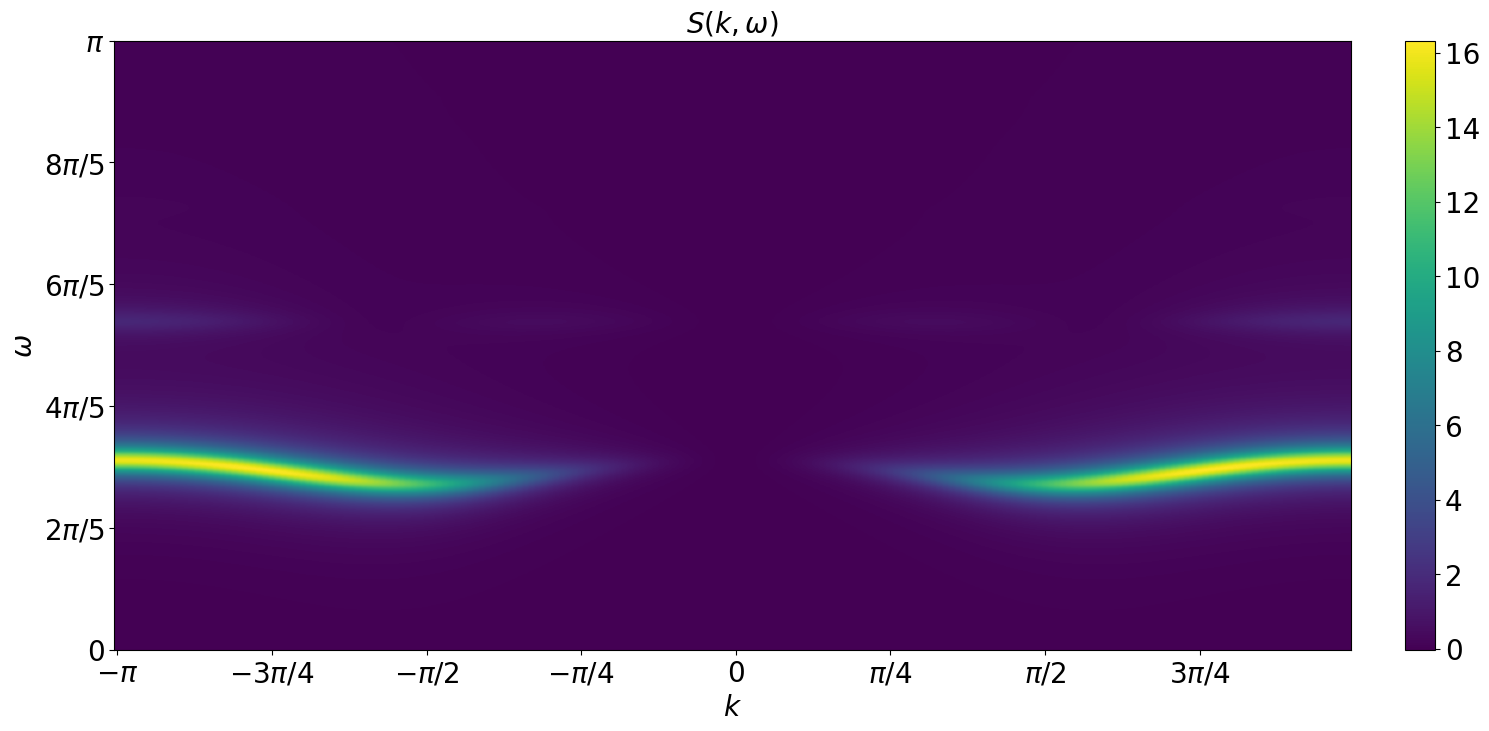

In [1108]:
# Plot the spectral function
fig=plt.figure(figsize=(15, 12 * goldenRatio), tight_layout=True)
ax = fig.add_subplot(111,title="", frame_on=True)

im1 = ax.imshow(g_k_w[:,:].real.transpose(), cmap = "viridis", norm = "linear", aspect = "auto", origin = "lower")
cbar=fig.colorbar(im1, fraction=0.035, pad=0.04)
cbar.ax.tick_params(labelsize=tickFontSize)


ax.set_xlabel(r"$k$", fontsize = 20)
ax.set_ylabel(r"$\omega$", fontsize  = 20)
ax.set_xticklabels([r"", r"$-\pi$", r"$-3\pi/4$", r"$-\pi/2$", r"$-\pi/4$", r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$"], fontsize = 20)
ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$\pi$"], fontsize = 20)
ax.set_ylim(500, 1000)


plt.title(r"$S(k, \omega)$", fontsize = 20)
plt.savefig('Figures/J1_J2_Heisenberg_Dimerized_TEBD_N200_T100_J20p4_delta0p5_Spectral_tau005.pdf')

In [86]:
# # Calculate the structure factor
# for index1 in range(k.shape[0]):
#     for index2 in range(omega.shape[0]):
#         # print(index1, index2)
#         for index3 in range(sites):
#             for index4 in range(int(N)):
#                 Szz[index1, index2] += 2 * math.pi / (sites * t) * np.exp(-1j * index1 * (index3 - reference)) 
#                 * np.exp(1j * (index2 + 1j * eta) * index4) * 2 * Czz_tau005[index4, index3].real

In [87]:
# hf = h5py.File('Data_tau005.h5', 'w')
# hf.create_dataset('Czz_unequaltime', data = Czz_tau005)
# hf.close()

In [88]:
chi1 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-8.h5", "Bond")
chi1.shape

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 199)


(1000, 199)

In [89]:
chi2 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.1_epsilon1E-10.h5", "Bond")
chi2[-1, :]

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 199)


array([  2.,   4.,   8.,  16.,  26.,  39.,  44.,  55.,  62.,  72.,  82.,
        87., 101., 101., 120., 130., 139., 153., 152., 170., 170., 183.,
       184., 193., 200., 204., 210., 217., 223., 228., 232., 238., 240.,
       252., 252., 265., 265., 277., 273., 284., 281., 289., 285., 293.,
       289., 297., 294., 303., 302., 310., 310., 314., 318., 318., 321.,
       322., 327., 323., 328., 324., 331., 327., 334., 330., 334., 330.,
       334., 331., 335., 333., 338., 334., 339., 335., 341., 338., 345.,
       341., 349., 345., 353., 347., 357., 348., 358., 349., 358., 349.,
       358., 351., 362., 356., 369., 366., 383., 383., 403., 404., 420.,
       410., 413., 396., 395., 374., 375., 361., 365., 354., 362., 352.,
       360., 350., 359., 348., 357., 347., 354., 347., 351., 343., 347.,
       339., 343., 336., 340., 333., 336., 333., 336., 332., 333., 331.,
       332., 328., 332., 328., 333., 328., 331., 326., 328., 324., 326.,
       321., 322., 317., 315., 312., 307., 306., 29

In [90]:
chi_tau005 = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_tau0.05_epsilon1E-10.h5", "Bond")
chi_tau005[-1, :]

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(2000, 199)


array([  2.,   4.,   8.,  16.,  24.,  35.,  40.,  47.,  50.,  59.,  70.,
        77.,  85.,  90., 102., 103., 116., 122., 128., 140., 142., 156.,
       150., 167., 161., 174., 168., 180., 176., 184., 181., 188., 189.,
       191., 195., 197., 202., 201., 206., 205., 212., 213., 220., 221.,
       226., 227., 229., 231., 232., 237., 236., 241., 239., 246., 243.,
       250., 247., 255., 250., 259., 253., 262., 255., 265., 259., 269.,
       262., 272., 266., 276., 269., 278., 272., 281., 274., 284., 278.,
       289., 282., 292., 287., 295., 291., 300., 297., 304., 301., 308.,
       305., 312., 311., 318., 320., 329., 334., 344., 354., 365., 370.,
       373., 368., 359., 347., 340., 328., 325., 315., 315., 306., 310.,
       302., 306., 298., 303., 295., 300., 290., 296., 286., 292., 281.,
       288., 278., 285., 275., 283., 272., 279., 269., 275., 265., 271.,
       261., 268., 258., 264., 253., 262., 253., 258., 249., 254., 245.,
       250., 242., 247., 240., 242., 235., 238., 23

In [91]:
label = [r"$\Delta\tau = 0.1; \epsilon = 10^{-10}$", r"$\Delta\tau = 0.05; \epsilon = 10^{-10}$"]
text_label = [r"$t=20$", r"$t=40$", r"$t=60$", r"$t=80$", r"$t=100$"]

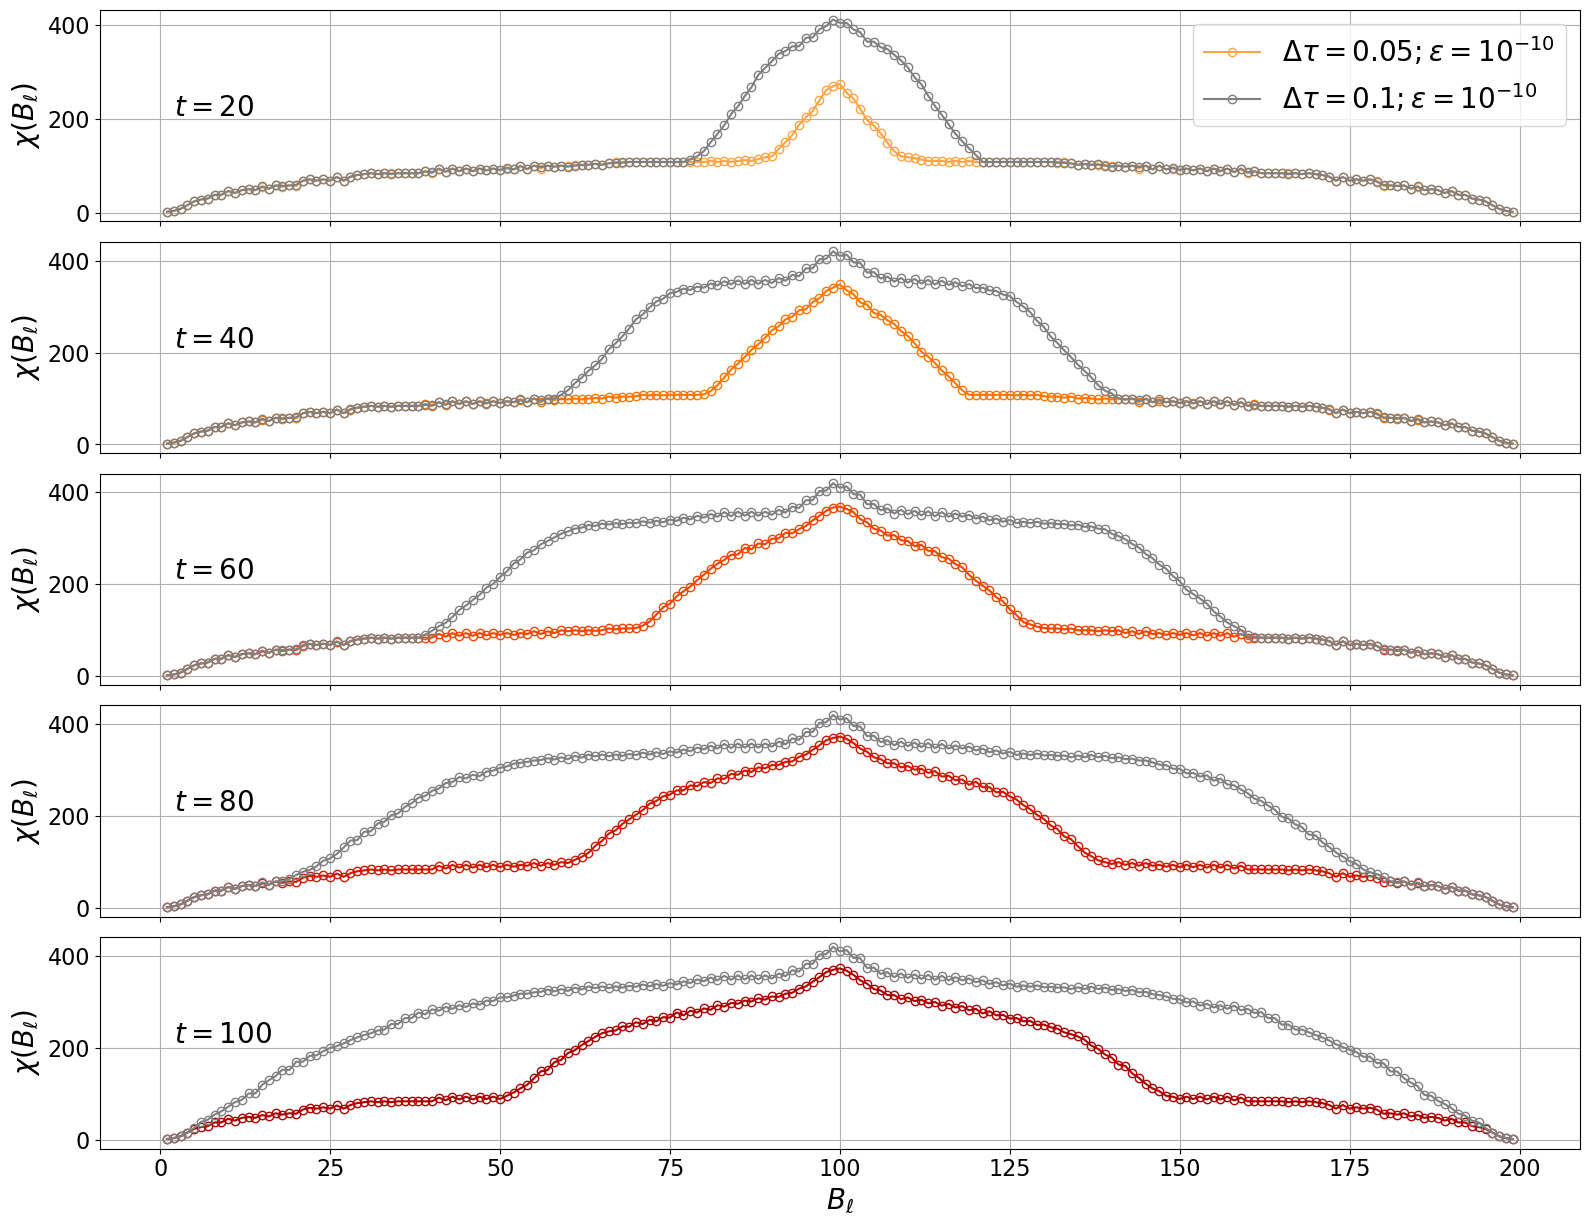

In [101]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 20 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 5, ncols = 1, figure = fig)

for index in range(5):
    ax = fig.add_subplot(spec[index, 0])
    # ax.plot(np.arange(1, 200), chi_tau002[(index + 1) * 500 - 1, :].real, color = color[index + 2], \
    #        marker = "o", markersize = 6, markerfacecolor = "none", label = label_tau002[index])
    ax.plot(np.arange(1, 200), chi_tau005[2 * (index + 1) * 100 - 1, :].real, color = color[index + 2], \
           marker = "o", markersize = 6, markerfacecolor = "none", label = label[1])
    ax.plot(np.arange(1, 200), chi2[2 * (index + 1) * 100 - 1, :].real, color = "gray", \
           marker = "o", markersize = 6, markerfacecolor = "none", label = label[0] )
    
    if index != 4:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("$B_{\ell}$", fontsize = 20)

    if index == 0:
        ax.legend(frameon = True, fontsize = 20, ncol = 1)

    ax.text(0.05, 0.5, text_label[index], transform = ax.transAxes, fontsize = 20)
    ax.set_ylabel(r'$\chi(B_{\ell})$', fontsize = 20)    
    ax.tick_params(axis = "both", which = "major", labelsize = 16)
    ax.grid()  

# plt.savefig('Figures/XX_Model_TEBD_N200_T100_chi_tau005.pdf')

In [368]:
# '''
#     Store the time-dependent spin correlation function to compare the exact solution
# '''

# file = open("Data/XX_Model_Time_Dependent_Correlation_Function_tau002.txt", "w")

# file.write(r"<S_{z}^{t}(100) S_{z}^{100}>" + " " * 25 + r"<S_{z}^{t}(126) S_{z}^{100}>" + " " * 25 \
#                + r"<S_{z}^{t}(176) S_{z}^{100}>" + "\n")
# for index in range(Czz_TD.shape[0]):
#     file.write("{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 99])  + " " * 12 + \
#                "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 125]) + " " * 12 + \
#                "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD_tau002[index, 175]) + "\n")
# file.close()